<a href="https://colab.research.google.com/github/girotodenis/semisupervisionada/blob/master/Lista_RL_2019_1_Davi_Denis_Naiara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercícios - Reinforcement Learning

NOME COMPLETO DOS INTEGRANTES DO GRUPO:

**Denis SIlva Giroto **

MATRÍCULAS DOS INTEGRANTES DO GRUPO:

**1931143029**

**AVISOS**:

- **Mantenha a estrutura de enunciados e células de resposta da lista original na lista a ser entregue.**
- **Todas as análises e justificativas solicitadas devem estar acompanhadas de códigos e plots realizados.**
- **As listas deverão ser compartilhadas no e-mail nguerinjr@gmail.com .**

# EXERCÍCIOS

In [ ]:
actions8 = [  
              (-1, -1), (-1, 0), (-1, 1),
              ( 0, -1),          ( 0, 1),
              ( 1,  1), ( 1, 0), ( 1, 1)
          ]
pcardeais8 = [
            '↖','↥','↗',
            '↤',     '↦',
            '↘','↧','↙']

actions4 = [  
                    (-1, 0),
          (0, -1),          (0, 1),
                    (1,  0)
          ]

pcardeais4 = [
                 'U',
            'L',     'R',
                 'D']
  
print(pcardeais8)

['↖', '↥', '↗', '↤', '↦', '↘', '↧', '↙']


In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random      
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
class Mundo:
    
  def __init__(self, y, x, i, f, pcardeais, actions, forca_vento_coluna, variacao_vento=False):
        
      self.row = y 
      self.col = x
      
      self.pcardeais = pcardeais
      self.actions = actions
        
      self.grade = [ (row, col) for row in range(self.row) for col in range(self.col)]
      self.forca_vento_coluna = forca_vento_coluna
      self.inicio = i
      self.fim = f
      self.grade = [ (row, col) for row in range(self.row) for col in range(self.col)]
      self.movimentos = []
      self.variacao_vento = variacao_vento
      
  def is_inicio(self, posicao):
      return posicao[0] == self.inicio[0] and posicao[1] == self.inicio[1]

  def is_fim(self, posicao):
      return posicao[0] == self.fim[0] and posicao[1] == self.fim[1]

  def pcardeal_to_action(self, pcardeal):
      indexes = [i for i,x in enumerate(self.pcardeais) if x == pcardeal]
      return self.actions[indexes[0]]

  def action_to_pcardeal(self, action):
      indexes = [i for i,x in enumerate(self.actions) if x == action]
      return self.pcardeais[indexes[0]]
      
  def mover(self, origem, movimento):
      
      destino = np.array(origem) + np.array(movimento)
      
      if -1 in list(destino) or self.col in list(destino):
          self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))  )
          return self.movimentos[-1]
          #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) 
      
      coluna_destino = destino[1]
      forca_vento = self.forca_vento_coluna[coluna_destino]
      
      if forca_vento > 0:
          forca = forca_vento
          if self.variacao_vento:
            r = random.randint(3)
            if r == 0:
              forca = forca_vento
            if r == 1:
              forca = forca_vento -1
            if r == 2:
              forca = forca_vento +1
              
          for it in range(forca_vento):
              destino = np.array(destino) + np.array(self.pcardeal_to_action('U'))
              if -1 in list(destino) or self.col in list(destino):
                  self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
                  return self.movimentos[-1]
                  #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))
      
      self.movimentos.append( (tuple(destino), self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
      return  self.movimentos[-1]
  
  def limpar_caminho_realizaso(self):
        self.movimentos = []  
  
  def caminho_realizaso(self,posicao_inicio):
      
      tmp = [[ '_' for row in range(self.row)] for col in range(self.col)]
      tmp = np.array(tmp)
      tmp[posicao_inicio] = 'i'
      tmp[self.fim] = 'f'
      
      
      movs = []
      if len(self.movimentos)>0 :
          for mov in self.movimentos:
              movs.append(mov[1])
              if mov[0] is not None and tmp[mov[0]] !='f':
                  tmp[mov[0]] = mov[1]
                  #tmp[mov[0]] = '_*'
          print(tmp)
      print('vento')
      print('UU '+('\','.join('\''+str(x) for x in self.forca_vento_coluna)))
      print('')
      return movs
      

In [ ]:
mundo = Mundo(4, 4, (0, 0), (3, 3), pcardeais4, actions4, [0,0,0,0])
posicao, movimento, inicio, fim = mundo.mover((0, 0), mundo.pcardeal_to_action('D'))
print(inicio,fim)
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('R'))
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('U'))
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('L'))

print(inicio,fim)
print(mundo.caminho_realizaso((0, 0)))
mundo.limpar_caminho_realizaso()
mundo.caminho_realizaso((0, 0))

False False
True False
[['L' 'U' '_' '_']
 ['D' 'R' '_' '_']
 ['_' '_' '_' '_']
 ['_' '_' '_' 'f']]
vento
UU '0','0','0','0

['D', 'R', 'U', 'L']
vento
UU '0','0','0','0



[]

In [ ]:
class Agente:
  def __init__(self, iterations = 10000): 
      #Rt = -1 -> em todas transições
      self.iterations = iterations
      self.states = None

  def learn(self, mundo, Algoritimo):
      
      #deltas = {(row, col):list() for row in range(mundo.row) for col in range(mundo.col)}
      
      tmp = [[Algoritimo(mundo.actions, row, col) for row in range(mundo.row)] for col in range(mundo.col)]

      self.states = np.array(tmp)
      
      deltas = []
      for it in range(self.iterations):
          #posicao = tuple(random.choice(mundo.grade))
          #posicao_i = posicao
          #mundo.limpar_caminho_realizaso()
          
          deltaState = Algoritimo.policy(it, self, self.states, mundo)
          deltas.append(deltaState)
          
          
          #sub = 0
          #while True:
          #    sub += 1
          #    if sub>1000:
          #        break
          #    current_cell = self.states[posicao]
          #    #print(current_cell)
          #    action = current_cell.explorar(mundo.actions)
          #    reward, nova_posicao = current_cell.takeAction(posicao, action, mundo)
          #    if nova_posicao is None:
          #        break
          #    next_cell =  self.states[nova_posicao] 
          #    old_cell_value = current_cell.value
          #    current_cell.learn(reward,current_cell, next_cell)
          #    deltas[posicao].append(float(np.abs(old_cell_value - current_cell.value)))
          #    posicao = nova_posicao
      #print('fim.')
      #all_series = [list(x)[:50] for x in deltas.values()]
      #return all_series

      return deltas

  def grid(self):
    for i in self.states:
      for j in i:
        try:
          print("{:.6}".format(j.value), end=" ")
        except:
          print(j.value, end=" ")
      print()

  def melhor_caminho(self,posicao_inicio, mundo):

      #posicao = mundo.inicio
      posicao = posicao_inicio
      
      mundo.limpar_caminho_realizaso()
      anterio = posicao_inicio
      for it in range(50):
          
          current_cell = self.states[posicao]
          
          valor = None
          action = None
          try:
            for mov in mundo.actions:
              
              nova_posicao, movimento, inicio, fim = mundo.mover(posicao, mov)
              del(mundo.movimentos[-1])
              if nova_posicao is not None and nova_posicao != anterio:
                proximo_cell = self.states[nova_posicao]
                if valor is None or valor < proximo_cell.value:
                  action = mov
                  valor = proximo_cell.value
            #action = current_cell.explorar(mundo.actions)
            nova_posicao, movimento, inicio, fim = mundo.mover(posicao, action)

            if nova_posicao is None or fim:
                break

            anterio = posicao
            next_cell =  self.states[nova_posicao] 
            posicao = nova_posicao
          except:
            1+1
            #print('saiu do mundo')
          
      return mundo.caminho_realizaso(posicao_inicio)

# EXERCÍCIO 1
1) Considere o gridworld do exemplo apresentado no slide 48/70 do tópico 3, onde há 14 estados não-terminais e 2 estados terminais. Nesse cenário, a recompensa é -1 para todas as transições, inclusive para os estados terminais. Nos slides apresentados (que também pode ser visto no livro base da disciplina), é possível ver diferentes iterações da policy evaluation e qual seria a política greedy correspondente. Em apenas 3 iterações, já a política greedy já é a política ótima.

Reimplemente o mesmo exemplo usando o algoritmo de policy iteration. Nesse caso, considere que cada etapa de policy evaluation terá apenas 1 iteração.

**Responda**: o algoritmo consegue chegar na política ótima? Quantas iterações entre evaluation e improvement foram necessárias? O método convergiu mais rápido do que a policy evaluation do exemplo? Exiba a política greedy obtida em cada iteração da policy iteration.

In [ ]:
class PolicyEvaluation:
    def __init__(self, actions, row, col):
        self.posicao = (row, col)
        self.reward_value = -1
        self.value = 0
        #self.epsilon = 0.1  

    def explorar(self, actions ):
        action = self.explore(actions)
        return action  
    
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        return action

    def takeAction(self, action, mundo):  
        if mundo.is_fim(tuple(self.posicao)):
            return self.reward_value, self.posicao

        nova_posicao, movimento, inicio, fim = mundo.mover(self.posicao, action)
        self.reward_value
        if nova_posicao is None or inicio:
            nova_posicao = self.posicao

        return self.reward_value, tuple(nova_posicao)
    
    def policy(it, agente, states, mundo):
      deltaState = []
      gamma = 1.0
      for i in states:
        for state in i:
          novo_valor = 0
          for action in mundo.actions:
            reward, nova_posicao = state.takeAction(action, mundo)
            next_cell =  states[nova_posicao]
            novo_valor += (1/len(mundo.actions))*(reward+(gamma*next_cell.value))
            if mundo.is_fim(nova_posicao):
              break

          deltaState.append(np.abs(state.value - novo_valor))
          state.value = novo_valor
      
      if it in [0,1,2,9, 99, agente.iterations-1]:
        agente.grid()
        print()
      return deltaState

###Policy Evaluation

-1.0 -1.0 -1.0 -1.0 
-1.75 -1.6875 -1.42188 -1.0 
-2.10547 -1.92188 -1.83594 -1.20898 
-2.0 -2.15771 -2.01123 -0.25 

-2.1875 -2.82324 -2.94434 -3.0658 
-3.56958 -3.43414 -3.38332 -3.02271 
-4.05417 -3.80928 -3.6032 -2.25273 
-4.02466 -3.93114 -3.28216 -0.3125 

-3.69196 -4.65687 -4.86442 -5.00866 
-5.40308 -5.31314 -5.22541 -4.76181 
-5.93884 -5.63564 -5.09899 -3.08566 
-5.91089 -5.52038 -4.31474 -0.328125 

-15.7362 -16.4942 -16.1645 -15.6789 
-17.0717 -16.4818 -15.1801 -13.8294 
-16.8794 -15.5456 -12.5872 -7.22385 
-16.3379 -13.9781 -9.49345 -0.333333 

-43.6431 -41.6533 -39.7169 -37.5935 
-41.6721 -39.6736 -35.5592 -32.1885 
-39.6307 -35.8247 -27.7253 -15.57 
-37.7731 -31.2278 -19.9543 -0.333333 



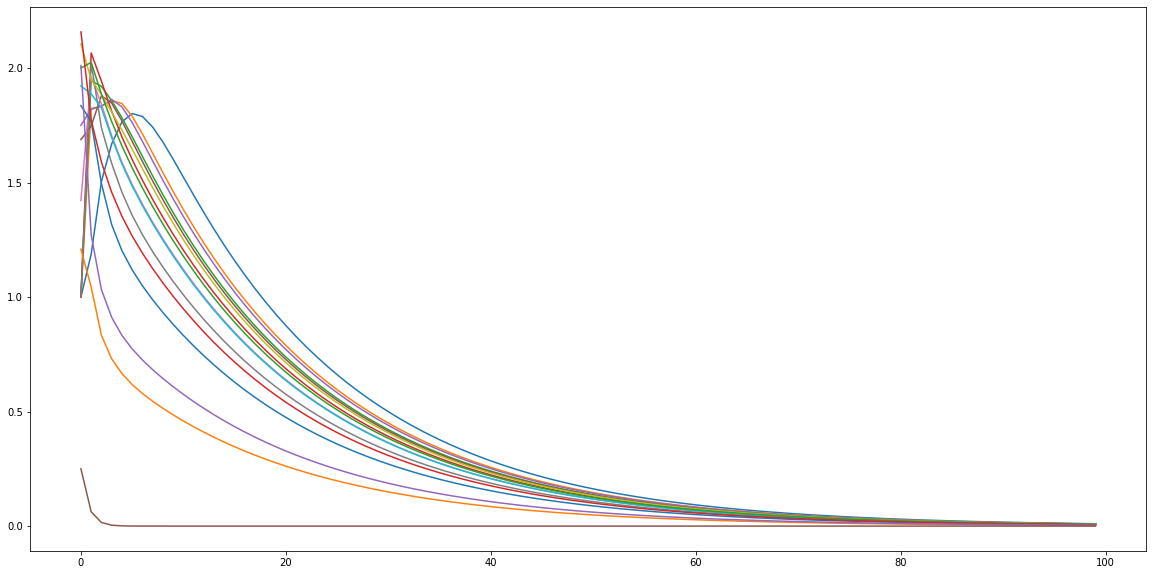

In [ ]:

mundo1 = Mundo(4, 4, (0, 0), (3, 3), pcardeais4, actions4, [0,0,0,0])
agente = Agente(100)
deltas = agente.learn(mundo1, PolicyEvaluation)
#print()
#print(agente.melhor_caminho(mundo.inicio, mundo))
plt.figure(figsize=(20, 10))
plt.plot(deltas)

In [ ]:
class PolicyIteration:
    def __init__(self, actions, row, col):
        self.posicao = (row, col)
        self.reward_value = -1
        self.value = 0
        #self.epsilon = 0.1  

    def explorar(self, actions ):
        action = self.explore(actions)
        return action  
    
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        return action

    def takeAction(self, action, mundo):  
        if mundo.is_fim(tuple(self.posicao)):
            return self.reward_value, self.posicao

        nova_posicao, movimento, inicio, fim = mundo.mover(self.posicao, action)
        self.reward_value
        if nova_posicao is None or inicio:
            nova_posicao = self.posicao

        return self.reward_value, tuple(nova_posicao)
    
    def policy(it, agente, states, mundo):
      deltaState = []
      gamma = 1.0
      for i in states:
        for state in i:
          values = [0 for a in mundo.actions];
          for i, action in enumerate(mundo.actions):
            reward, nova_posicao = state.takeAction(action, mundo)
            next_cell =  states[nova_posicao]
            values[i] += (1/len(mundo.actions))*(reward+(gamma*next_cell.value))
            if mundo.is_fim(nova_posicao):
              break

          novo_valor = max(values)
          deltaState.append(np.abs(state.value - novo_valor))
          state.value = novo_valor
      
      if it in [0,1,2,9, 99, agente.iterations-1]:
        agente.grid()
        print()
      return deltaState

###Policy Iteration

-0.25 -0.25 -0.25 -0.25 
-0.25 -0.25 -0.25 -0.25 
-0.3125 -0.25 -0.25 0 
-0.3125 -0.25 -0.25 0 

-0.3125 -0.3125 -0.3125 -0.3125 
-0.3125 -0.3125 -0.3125 -0.3125 
-0.328125 -0.3125 -0.25 0 
-0.328125 -0.25 -0.25 0 

-0.328125 -0.328125 -0.328125 -0.3125 
-0.328125 -0.328125 -0.3125 -0.3125 
-0.328125 -0.3125 -0.25 0 
-0.328125 -0.25 -0.25 0 

-0.333008 -0.332031 -0.328125 -0.3125 
-0.332031 -0.328125 -0.3125 -0.3125 
-0.328125 -0.3125 -0.25 0 
-0.328125 -0.25 -0.25 0 

-0.333008 -0.332031 -0.328125 -0.3125 
-0.332031 -0.328125 -0.3125 -0.3125 
-0.328125 -0.3125 -0.25 0 
-0.328125 -0.25 -0.25 0 



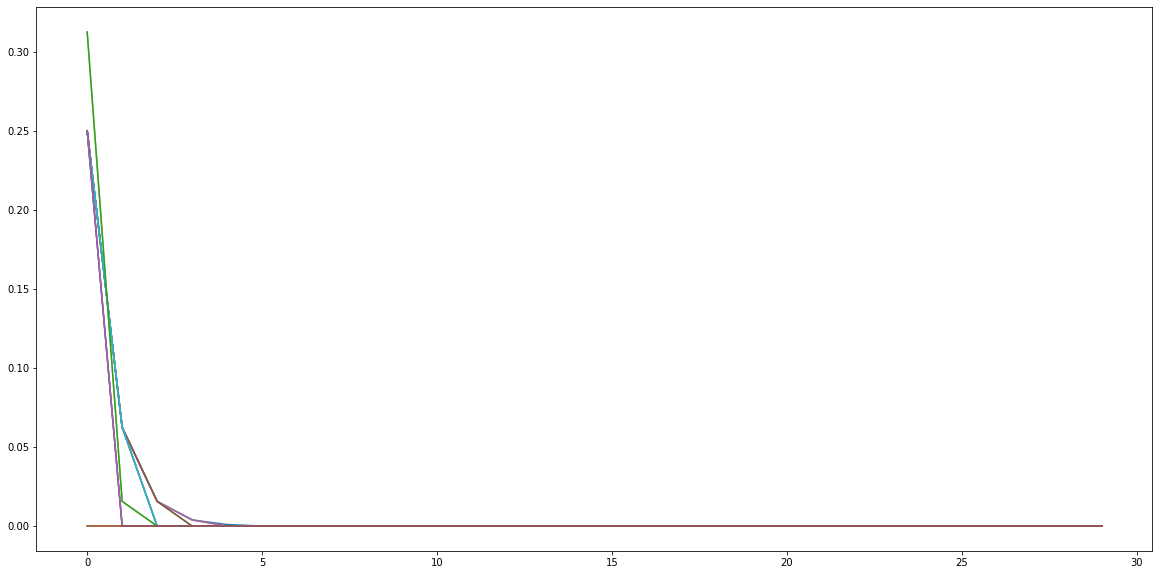

In [ ]:
mundo2 = Mundo(4, 4, (0, 0), (3, 3), pcardeais4, actions4, [0,0,0,0])
agente2 = Agente(30)
deltas2 = agente2.learn(mundo2, PolicyIteration)
#rint()
#print(agente2.melhor_caminho(mundo.inicio, mundo))
plt.figure(figsize=(20, 10))
plt.plot(deltas2)

# EXERCÍCIO 2
2) Escolha um gridworld de preferência dentre os constantes na library de gridworlds e treine um agente nesse gridworld usando o método de Monte Carlo. Exiba uma demonstração do agente andando pelo gridworld após o treinamento realizado.

In [ ]:
gamma = 0.6
reward_value = -1
grid_size = 4
terminal_states = [[0,0], [grid_size-1, grid_size-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
iterations = 10000

In [ ]:
V = np.zeros((grid_size, grid_size))
returns = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
deltas = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

In [ ]:
def generateEpisode():
    posi1 = random.randint(len(states))
    posi2 = random.randint(len(states[0]))
    init_state = (posi1, posi2)
    #init_state = random.choice(states[1:-1])
    episode = []

    while True:
        if list(init_state) in terminal_states:
            return episode
        #action = random.choice(actions)
        p1 = random.randint(len(actions))
        action = actions[p1]
        final_state = np.array(init_state) + np.array(action)
        if -1 in list(final_state) or grid_size in list(final_state):
            final_state = init_state
        episode.append([list(init_state), action, reward_value, list(final_state)])
        init_state = final_state

In [ ]:
for it in range(iterations):
    episode = generateEpisode()
    G = 0

    mediadelta = 1;
    if(it>1):
      ultimoserros = []
      all_series = [list(x)[1:] for x in deltas.values()]
      for posi in all_series:
        if(len(posi)>0):
          ultimoserros.append(posi[-1])
      mediadelta = np.mean(ultimoserros)
    
    if(mediadelta<0.001):
      print("total it",it)
      break

    episode = episode[::-1]
    for i, (initial_position, action, reward, final_position) in enumerate(episode):
        G = gamma * G + reward # Usa a propriedade recursiva do horizonte descontado
        # First-visit MC: só considera o retorno obtido se o estado não foi visitado
        # Every-visit MC: considera todos os retornos obtidos em visitas a um único estado
        if initial_position not in [x[0] for x in episode[len(episode)-i:]]:
            idx = tuple(initial_position)
            # Returns vai guardar o horizonte para este estado naquele momento
            returns[idx].append(G)
            new_value = np.average(returns[idx])
            deltas[idx].append(np.abs(V[idx] - new_value))
            V[idx] = new_value

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

# EXERCÍCIO 3

3) Implemente agora o Sarsa no cenário **Windy Gridworld with King's Moves**. Esse cenário é o mesmo windy gridworld mas, dessa vez, há oito possíveis ações: as usuais e as ações nas diagonais.

Compare os resultados no grid com o cenário do exercício 3. Responda com base nos experimentos e plots: ter a disposição mais ações ajuda a acelerar a convergência do algoritmo? O caminho escolhido pelo agente muda?

In [ ]:
class EpsilonGreedy:
    def __init__(self, actions, row, col):
        self.posicao = (row, col)
        self.epsilon = 0.1
        self.reward_value = -1
        self.value = 0
        self.values = [0 for a in actions];
        self.indexActions = -1;
        self.gamma = 1.0
        self.alpha = 0.5
        self.deltaState = []

    def explorar(self, actions ):
        p = np.random.random()
        if (p < self.epsilon):
            action = self.explore(actions)
        else:
            action = self.exploit(actions)       
        self.value = self.values[self.indexActions]
        return action  

    def exploit(self, actions):
        self.indexActions = self.values.index(max(self.values))
        action = actions[self.indexActions]
        return action

    def explore(self, actions):
        posi = random.randint(len(actions))
        action = actions[posi];
        self.indexActions = actions.index(action)
        return action

    def takeAction(self, action, mundo):  
        if mundo.is_fim(tuple(self.posicao)):
            return self.reward_value, self.posicao
        nova_posicao, movimento, inicio, fim = mundo.mover(self.posicao, action)
        self.reward_value
        
        if nova_posicao is None:
          return -10, self.posicao

        if nova_posicao is None or inicio:
            nova_posicao = self.posicao

        return self.reward_value, tuple(nova_posicao)
    
    def policy(it, agente, states, mundo):
      deltaState = []
      posi = random.randint(len(mundo.grade))
      posicao = mundo.grade[posi]
      posicao_i = posicao

      mundo.limpar_caminho_realizaso()
      sub = 0
      while True:
        
        sub += 1
        if sub>1000:
            break

        current_cell = states[posicao]
        action = current_cell.explorar(mundo.actions)
        reward, nova_posicao = current_cell.takeAction(action, mundo)

        if mundo.is_fim(nova_posicao):
          break
        
        next_cell =  states[nova_posicao]
        old_cell_value = current_cell.value

        #current_cell.value += current_cell.alpha * (reward + current_cell.gamma * next_cell.value - current_cell.value) #Sarsa
        current_cell.value += current_cell.alpha * (reward + current_cell.gamma * next_cell.values[current_cell.indexActions] - current_cell.value) #Sarsa
        #current_cell.value += current_cell.alpha * (reward + current_cell.gamma * np.max(next_cell.values) - current_cell.value)
        current_cell.values[current_cell.indexActions] = current_cell.value

        current_cell.deltaState.append( float(np.abs(old_cell_value - current_cell.value)) )
        
        if(len(deltaState)>50):
          deltaState.append( np.abs(old_cell_value - current_cell.value))
        
        posicao = nova_posicao
      
      if it in [100,200,1000,2000, 2500, agente.iterations-1]:
        print('it',it)
        agente.grid()
        print()
        #try:
        print(agente.melhor_caminho(mundo.inicio, mundo))
        #except:
        #  print('erro')
      
      return deltaState

it 100
-5.47131 -8.125 -6.1668 -7.46542 -8.72878 -8.69531 -10.085 -9.14624 -8.49994 -9.07686 
-10.375 -6.1111 -7.51562 -10.5 -6.51115 -7.73867 -6.64648 -8.24902 -6.99996 -8.278 
-6.61823 -6.38063 -5.99222 -6.15527 -6.26562 -5.55472 -7.625 -9.84375 -7.55566 -5.0 
-5.8125 -6.31528 -7.50049 -5.19914 -4.77254 -5.23012 -3.60974 -4.65625 -4.08594 -3.0 
-8.06235 -7.91716 -6.22445 -6.00114 -4.10681 -3.61737 -4.625 -0.9375 -0.999939 -1.0 
-8.91895 -9.73755 -9.3125 -7.03125 -4.27789 -4.28735 -2.27051 -1.77002 0 -1.79688 
-17.8125 -9.61237 -7.99316 -4.90499 -3.38693 -2.4233 -0.5 -1.43945 -1.40625 -1.5 
-9.80469 -9.64044 -7.42073 -4.59302 -1.99841 0 -1.4541 -1.25 -0.5 -1.44141 
-18.1113 -8.00848 -5.99999 -4.0 -2.0 0 -1.875 -1.25 0 -0.5 
-14.1758 -6.25 -9.98242 -6.65625 -8.75 -1.40625 -5.0 0 -0.5 -0.75 

[['q' 'R' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' 'D' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' '_' 'e' '_' '_' '_' '_' '_' '_' '_']
 ['q' 'R' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' 'e' '_' '_' '_' '_'

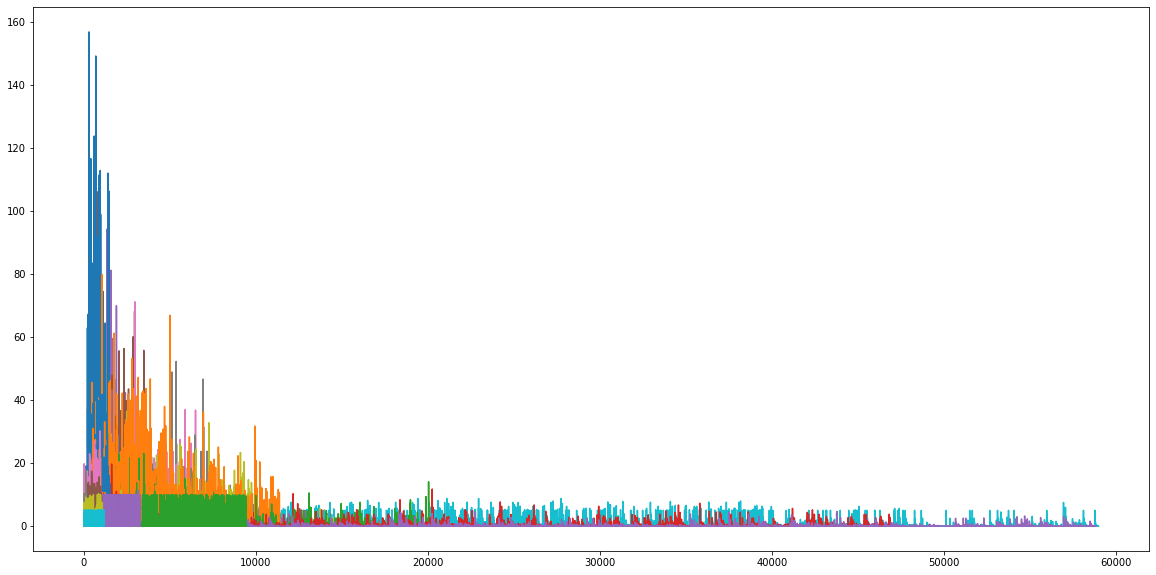

In [ ]:
mundo4 = Mundo(10, 10, (5, 0), (5, 8), pcardeais8, actions8, [0,0,0,1,1,1,2,2,1,0])
agente4 = Agente(100000)
deltas4 = agente4.learn(mundo4, EpsilonGreedy)
print()
#print(agente4.melhor_caminho(mundo4.inicio, mundo4))
plt.figure(figsize=(20, 10))

all_series=[]
for i in agente4.states:
  for j in i:
    all_series.append( list(j.deltaState)[:-50] )

#all_series = [list(s.deltaState)[:50] for s in agente4.states]
for series in all_series:
    plt.plot(series)
#plt.plot(all_series)

# EXERCÍCIO 4

4) Considere uma nova variação do windy gridworld com king's move. Assuma que o efeito do vento, quando há algum, é estocástico, algumas vezes variando 1 unidade da média especificada em cada coluna. Ou seja, 1/3 das vezes o movimento é dado exatamente por estes valores, como no exercício anterior, mas 1/3 das vezes você move-se 1 célula acima do esperado e no último 1/3 das vezes você move 1 célula abaixo do valor esperado para o vento naquela coluna. Exiba e analise a trajetória do agente nesse gridworld.

it 100
-3.00384 -5.39047 -6.36156 -6.80597 -10.125 -8.74236 -9.91901 -7.0 -7.02145 -7.92592 
-4.6427 -5.25684 -5.65625 -5.95192 -7.0293 -7.5321 -7.14062 -6.76318 -8.23584 -6.86624 
-10.4481 -12.5 -5.625 -5.65625 -7.23438 -5.84443 -5.70656 -5.05558 -5.89095 -5.0 
-7.3886 -6.40305 -5.95303 -5.39062 -5.71191 -6.62109 -4.75 -2.93082 -3.13219 -3.0 
-9.31439 -7.55438 -6.11313 -4.98277 -3.86121 -3.26025 -1.9375 -0.75 -0.999969 -1.0 
-9.375 -7.79064 -6.80825 -6.74585 -4.18115 -2.49805 -2.37988 -2.19141 -2.39844 -0.9375 
-15.0142 -7.98952 -7.34412 -5.58221 -3.65952 -3.75 -0.75 -1.26562 -0.5 -1.125 
-8.20898 -7.92502 -6.56712 -4.17952 -1.99934 0 0 -2.0 -0.5 0 
-7.96484 -7.74177 -5.97224 -4.0 -2.0 0 0 -0.5 0 -0.5 
-14.375 -10.056 -7.4375 -7.5 -5.6875 -8.75 -1.25 -0.5 -0.5 -0.5 

[['q' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['D' 'R' '_' '_' '_' '_' '_' '_' '_' '_']
 ['_' '_' 'q' '_' '_' '_' '_' '_' '_' '_']
 ['_' '_' 'e' 'D' '_' '_' '_' '_' '_' '_']
 ['_' 'e' '_' '_' '_' '_' '_' '_' '_' '_']
 ['i' 

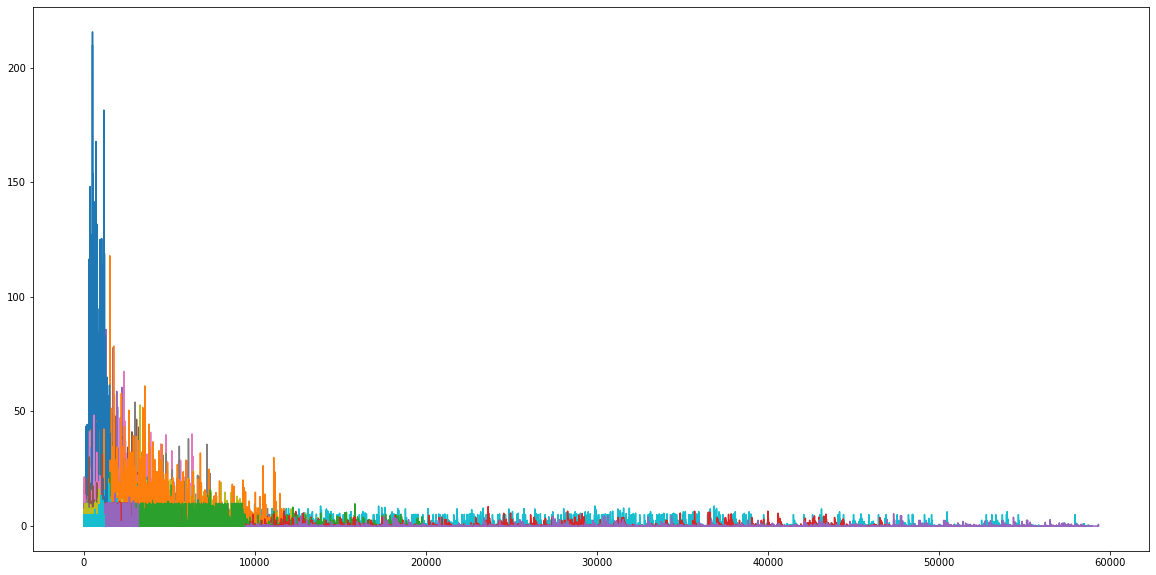

In [ ]:
mundo4 = Mundo(10, 10, (5, 0), (5, 8), pcardeais8, actions8, [0,0,0,1,1,1,2,2,1,0], True)
agente4 = Agente(100000)
deltas4 = agente4.learn(mundo4, EpsilonGreedy)
print()
#print(agente4.melhor_caminho(mundo4.inicio, mundo4))
plt.figure(figsize=(20, 10))

all_series=[]
for i in agente4.states:
  for j in i:
    all_series.append( list(j.deltaState)[:-50] )

#all_series = [list(s.deltaState)[:50] for s in agente4.states]
for series in all_series:
    plt.plot(series)
#plt.plot(all_series)

# EXERCÍCIO 5

5) Implemente o cenário do "The Cliff", apresentado em sala de aula. Utilize tanto o Sars quanto o Q-learning. Faça comparações dos resultados com a política greedy do agente após 100, 1000 e 10000 episódios.

OBS.: utilize uma estratégia epsilon-greedy para a dinâmica do agente. Especifique hiperparâmetros de forma a conseguir convergência do algoritmo.

In [ ]:
# Células de código aqui

<EM CONSTRUÇÃO>